# 数据的图形表示
By Evgenia "Jenny" Nitishinskaya, Maxwell Margenot, and Delaney Granizo-Mackenzie.

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)



图形化地表示数据对于了解数据的行为以及查看潜在的结构或缺陷非常有用。我们应该小心，因为人类非常善于只看到证实我们信念的证据，而视觉数据本身就很好地证明了这一点。当形成一个假设时，使用绘图是好的，但是不应该用来测试一个假设。

我们将在这里讨论一些常见的绘图。

In [1]:
# Import our libraries

# This is for numerical processing
import numpy as np
# This is the library most commonly used for plotting in Python.
# Notice how we import it 'as' plt, this enables us to type plt
# rather than the full string every time.
import matplotlib.pyplot as plt

## 得到一些数据

如果我们要绘制数据，我们需要一些数据来绘制。我们将获得苹果(Apple)和微软(Microsoft)的股价数据，以在我们的示例中使用。

### 数据结构

了解数据的结构非常重要。通常，您需要做大量的工作，将数据转换成需要测试的表单。Quantopian已经对数据进行了大量的清理，但你仍然需要将其放入正确的形状和格式中，以满足你的需要。

在这种情况下，数据将作为pandas DataFrame对象返回。行是时间戳，列是两项资产，AAPL和MSFT。

In [2]:
import pandas_datareader.data as data
start = '2014-01-01'
end = '2015-01-01'
data = data.get_data_yahoo(['AAPL', 'MSFT'], start, end)['Close']
data.head()

Symbols,AAPL,MSFT
Date,,
2013-12-31,80.145714,37.410000
2014-01-02,79.018570,37.160000
2014-01-03,77.282860,36.910000
2014-01-06,77.704285,36.130001
2014-01-07,77.148575,36.410000


索引到2维dataframe将为我们提供一个1维 series对象。该系列的索引是时间戳，索引后的值是价格。类似于数组，除了它是times而不是integer indecies。

In [3]:
data['MSFT'].head()

Date
2013-12-31    37.410000
2014-01-02    37.160000
2014-01-03    36.910000
2014-01-06    36.130001
2014-01-07    36.410000
Name: MSFT, dtype: float64

## 柱状图

直方图是对不同数据值的频率的可视化。通过使用条形图显示频率分布，我们可以快速地看到大多数观测结果的聚集位置。每个条的高度表示每个间隔内的观察次数。你可以把直方图看作一个经验的离散的概率密度函数(PDF)。

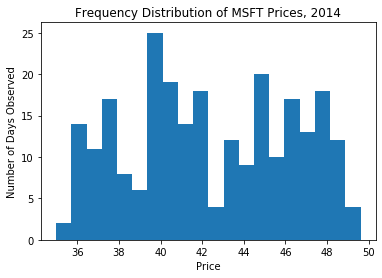

In [4]:
# Plot a histogram using 20 bins
plt.hist(data['MSFT'], bins=20)
plt.xlabel('Price')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of MSFT Prices, 2014');

### 回报率直方图

在金融领域，我们很少关注价格的分布。其原因是，价格是不稳定的，经常变动。关于非平稳性的更多信息请参见[这个讲座](https://www.quantopian.com/lectures/integr-cointegring-andarity)。相反，我们将使用日回报率。我们现在就试试。

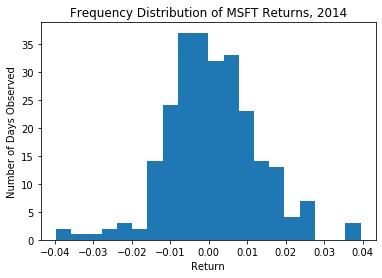

In [5]:
# Remove the first element because percent change from nothing to something is NaN
R = data['MSFT'].pct_change()[1:]

# Plot a histogram using 20 bins
plt.hist(R, bins=20)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of MSFT Returns, 2014');

如上图所示，2014年MSFT的日回报率只有在不到5天的时间里位于0.03以上。请注意，我们完全放弃了与这些返回值对应的日期。

##### 重要:还要注意，这并不意味着未来的回报将有相同的分布。

### 累积直方图(离散估计CDF)

显示数据的另一种方法是使用累积分布函数，其中条形图的高度表示位于该bin或之前的某个bin中的观察值的数量。这个图总是不递减的，因为不可能有负数的观测值。图形的选择取决于您感兴趣的信息。

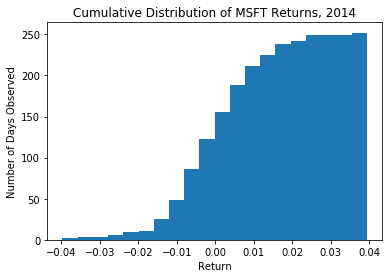

In [6]:
# Remove the first element because percent change from nothing to something is NaN
R = data['MSFT'].pct_change()[1:]

# Plot a histogram using 20 bins
plt.hist(R, bins=20, cumulative=True)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Cumulative Distribution of MSFT Returns, 2014');

## 散点图

散点图对于可视化两个数据集之间的关系很有用。我们使用两个具有某种对应关系的数据集，例如测量的日期。每个点表示来自两个数据集的两个对应值。然而，我们没有标出测量的日期。

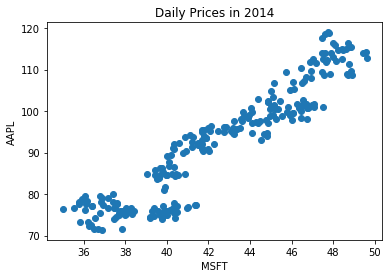

In [8]:
plt.scatter(data['MSFT'], data['AAPL'])
plt.xlabel('MSFT')
plt.ylabel('AAPL')
plt.title('Daily Prices in 2014');

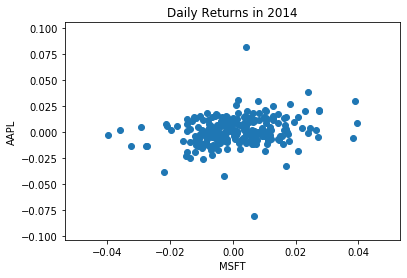

In [9]:
R_msft = data['MSFT'].pct_change()[1:]
R_aapl = data['AAPL'].pct_change()[1:]

plt.scatter(R_msft, R_aapl)
plt.xlabel('MSFT')
plt.ylabel('AAPL')
plt.title('Daily Returns in 2014');

# 线形图

当我们想要在x值变化时跟踪y值的变化时，可以使用线图。例如，当我们绘制股票价格时，将其显示为线图，而不是仅仅绘制数据点，可以更容易地跟踪价格随时间的变化。这必然涉及到数据点之间的“连接点”，它可以掩盖我们测量之间发生的变化。

D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


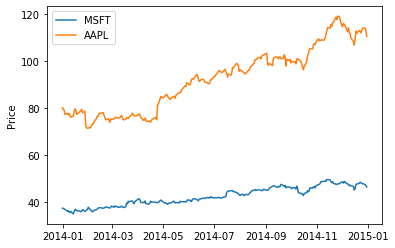

In [10]:
plt.plot(data['MSFT'])
plt.plot(data['AAPL'])
plt.ylabel('Price')
plt.legend(['MSFT', 'AAPL']);

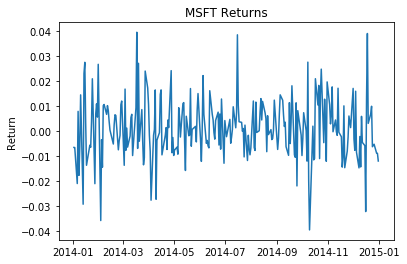

In [11]:
# Remove the first element because percent change from nothing to something is NaN
R = data['MSFT'].pct_change()[1:]

plt.plot(R)
plt.ylabel('Return')
plt.title('MSFT Returns');

## 永远不要假设条件不变

同样，无论何时使用图表来可视化数据，不要假设可以通过查看图表来测试假设。也不要假设，因为一个分布或趋势过去是正确的，它仍然是正确的。通常需要更复杂和仔细的验证来测试模型是否成立。当最初决定模型应该如何工作时，绘图主要是有用的。